In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

## Lecture 19 2-D Visualization, pseudocolor, contour, gridding on maps
    
### In this lecture we will:

- Concepts: grid mesh, 2-D pseudocolor plots, contours
- Python tricks: matplotlib 2-D visualization functions

### 1. N-Dimensional NumPy Arrays

Recall the 2-D numpy arrays we've learned in Lecture 7:

In [2]:
import numpy as np # load the numpy module

# define a 2-D numpy array using the .array() method
np_2d = np.array([[31.73, 21.68, 41.71, 31.89, 71.79],
                  [65.4, 59.2, 63.6, 88.4, 68.7],
                  [35,   28  , 23  , 29  , 32  ]])

print(np_2d) # print the results
print(np_2d.shape)
print(np_2d.size)

[[31.73 21.68 41.71 31.89 71.79]
 [65.4  59.2  63.6  88.4  68.7 ]
 [35.   28.   23.   29.   32.  ]]
(3, 5)
15


Here's a Pseudo-color plot for the 2-D Numpy array named np_2d:

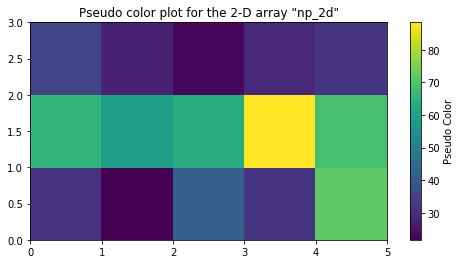

In [3]:
plt.figure(figsize=(8,4))
plt.pcolor(np_2d)
#plt.xlabel('column index')
#plt.xticks(np.arange(0,6,1))
#plt.ylabel('row index')
plt.title('Pseudo color plot for the 2-D array "np_2d"')
bar=plt.colorbar()
#bar=fig.colorbar()
bar.set_label('Pseudo Color');

We briefly mentioned **2-D NumPy arrays** previously but quickly moved into plotting and Pandas. But **2-D arrays** are essential to visualization skills, so we need to bite the bullet and learn more about them now. 

Recall: **Arrays**  in **Numpy**  are somewhat  similar to  lists but there are important differences with advantages and disadvantages. Unlike lists,   **arrays** are usually all of the same data type (**dtype**), usually numbers (integers or floats) and at times characters.  A "feature" of arrays is that the size,  shape and type are fixed when it's created. 

Remeber, we can define a list:

L=[ ]

then append to it as desired. It is more complicated (but still possible) to **extend** arrays. 

Recall: Why use arrays when you can use lists?  Arrays are far more computationally efficient than lists, particularly for things like matrix math.  You can perform calculations on the entire array in one go instead of looping through element by element as for lists.  

To make things a little confusing, there are  several different data objects that are loosely called arrays, e.g., arrays, character arrays and matrices.  These are all subclasses of **ndarray** (N-dimensional array).  We will just worry about _arrays_ in this course.  

Recall: reading in a data file with 2-D **NumPy Array**, as we did before:

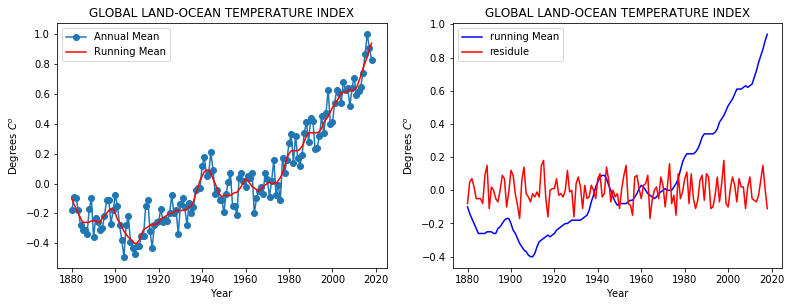

In [4]:
import numpy as np
import matplotlib.pyplot as plt

temp_anom = np.loadtxt('datasets/temperature.txt')

year = temp_anom[:,0]       # column 0: year 
anomaly = temp_anom[:,1]    # column 1: annual temperature anomaly 
lowess = temp_anom[:,2]     # column 2: the long-term trend of the temperature anomaly
residul = anomaly - lowess  # year-to-year variations

plt.figure(figsize=(13,4.5)) # start a figure, set the size of the figure

plt.subplot(1,2,1) # the left panel
plt.plot(year, anomaly,marker = 'o',label='Annual Mean')
plt.plot(year, lowess, 'r-',label='Running Mean')
plt.xlabel('Year')
plt.ylabel('Degrees $C^o$')
plt.title('GLOBAL LAND-OCEAN TEMPERATURE INDEX')
plt.legend()

plt.subplot(1,2,2) # the right panel
plt.plot(year, lowess,'b-',label='running Mean')
plt.plot(year, residul, 'r-',label='residule')
plt.xlabel('Year')
plt.ylabel('Degrees $C^o$')
plt.title('GLOBAL LAND-OCEAN TEMPERATURE INDEX')
plt.legend()

plt.show() # show your plot!

here **temp_anom** is a 2-D NumPy array, we used index slicing through columns to access the 1-D data for plotting using the plot() function in matplotlib.

### 2. Applying 2-D NumPy Arrays: Create a color mesh using meshgrid( )

In [5]:
x = np.arange(-1.0, 1.1, 0.1) # make a 1D array from -1.0 to 1.0 with a spacing of .1
y = np.arange(0.0, 1.1, 0.1) # ditto
xx, yy = np.meshgrid(x, y) # make a meshgrid
print(x.shape)
print(y.shape)
print(xx.shape)
print(yy.shape)
# print (xx[0:5])

(21,)
(11,)
(11, 21)
(11, 21)


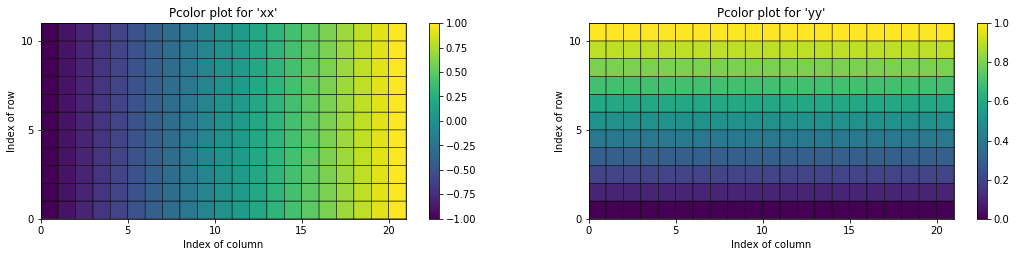

In [6]:
plt.figure(figsize=(18,3.6))
plt.subplot(1,2,1)
plt.pcolor(xx, edgecolors='k', linewidths=0.5)
plt.xticks(np.arange(0,21,5))
plt.yticks(np.arange(0,11,5))
plt.xlabel('Index of column')
plt.ylabel('Index of row')
plt.title("Pcolor plot for 'xx'")
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(yy, edgecolors='k', linewidths=0.5)
plt.xticks(np.arange(0,21,5))
plt.yticks(np.arange(0,11,5))
plt.xlabel('Index of column')
plt.ylabel('Index of row')
plt.title("Pcolor plot for 'yy'")
plt.colorbar()

### 3. Create a pseudocolor plot using pcolor( )

Here we have created two 2-D NumPy arrays "xx" and "yy", both of them are 2-D NumPy arrays with 11 rows and 21 columns, these two arrays are called a 2-D grid "Mesh". Now we can create data based on this "Mesh" and use matplotlib to generate color plots for visualization.

Let's model the following function $z(x,y)$ using the (xx,yy) mesh:

$$z(x,y) = \sin(x\pi)\sin(y\pi)$$

First we create a new NumPy array:

In [7]:
z = np.sin(xx*np.pi)*np.sin(yy*np.pi)
print (z[0:5])

[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.78436673e-17 -9.54915028e-02 -1.81635632e-01 -2.50000000e-01
  -2.93892626e-01 -3.09016994e-01 -2.93892626e-01 -2.50000000e-01
  -1.81635632e-01 -9.54915028e-02 -2.15562128e-16  9.54915028e-02
   1.81635632e-01  2.50000000e-01  2.93892626e-01  3.09016994e-01
   2.93892626e-01  2.50000000e-01  1.81635632e-01  9.54915028e-02
   4.49537006e-16]
 [-7.19829328e-17 -1.81635632e-01 -3.45491503e-01 -4.75528258e-01
  -5.59016994e-01 -5.87785252e-01 -5.59016994e-01 -4.75528258e-01
  -3.45491503e-01 -1.81635632e-01 -4.10023533e-16  1.81635632e-01
   3.45491503e-01  4.75528258e-01  5.59016994e-01  5.87785252e-01
   5.59016994e-01  4.75528258e-01  3.4

Then let's try color each $z$ value with color using the pcolor() function:

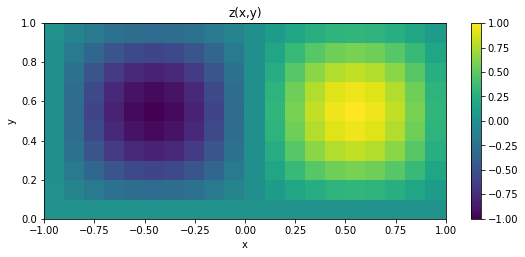

In [8]:
plt.figure(figsize=(9,3.6))
plt.pcolor(xx,yy,z)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')
plt.colorbar()

The resolution looks funny, because we only used $21\times 11$ points to make the color plot - huge pixels! Let's make it finer (put everything together):

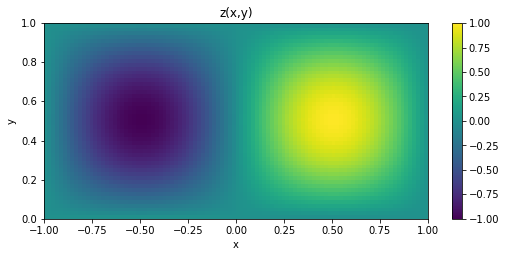

In [9]:
x = np.arange(-1.0, 1.02, 0.02) # make a 1D array from -1.0 to 1.0 with a spacing of .02
y = np.arange(0.0, 1.02, 0.02) # ditto
xx, yy = np.meshgrid(x, y) # make a meshgrid
z = np.sin(xx*np.pi)*np.sin(yy*np.pi)

plt.figure(figsize=(8.6,3.6))
plt.pcolor(xx,yy,z,vmin=-1,vmax=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')

plt.colorbar()

Now we can choose different colormaps. Here's a more detailed documentation about Python colormaps: https://matplotlib.org/users/colormaps.html. The default one is called "viridis", other commonly used ones are:

- rainbow (be careful with this one)
- hot
- bwr

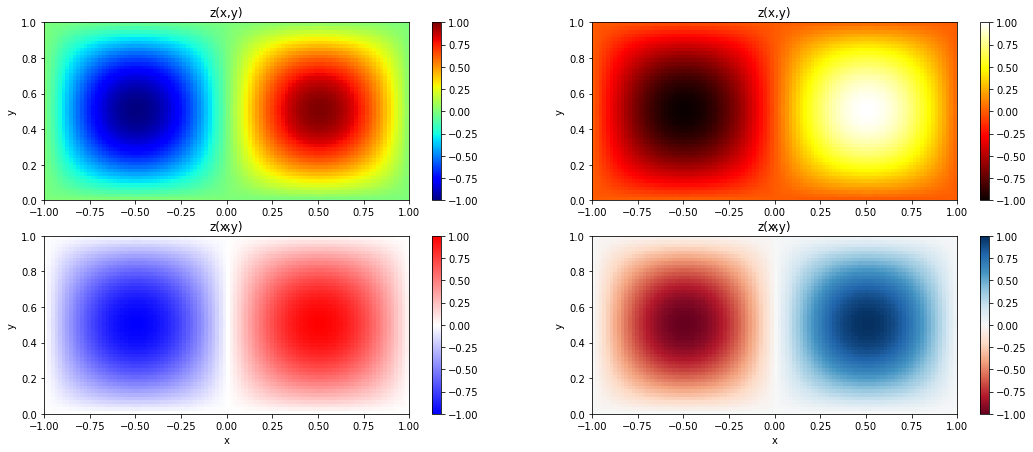

In [10]:
plt.figure(figsize=(9*2,3.6*2))

plt.subplot(2,2,1)
plt.pcolor(xx,yy,z,cmap='jet',vmin=-1,vmax=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolor(xx,yy,z,cmap='hot',vmin=-1,vmax=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')
plt.colorbar()

plt.subplot(2,2,3)
plt.pcolor(xx,yy,z,cmap='bwr',vmin=-1,vmax=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')
plt.colorbar()

plt.subplot(2,2,4)
plt.pcolor(xx,yy,z,cmap='RdBu',vmin=-1,vmax=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')
plt.colorbar()

in-class practice 1, generate a 2-D function and play with colormaps

### 4. Applying 2-D NumPy Arrays: Create color contours using contour( ) and contourf( )

The pcolor( ) function gives you pixel-like color plots by coloring each rectangular grid with color corresponding to its value in the colormap. Another useful way to visualize 2-D data is using contours:

Text(0.5,1,'z(x,y)')

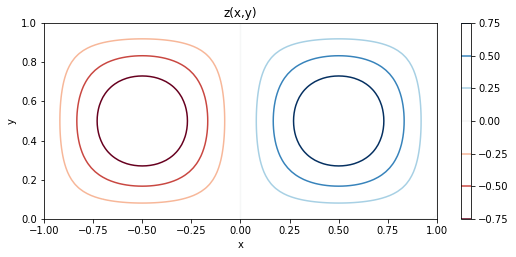

In [11]:
x = np.arange(-1.0, 1.02, 0.02) # make a 1D array from -1.0 to 1.0 with a spacing of .02
y = np.arange(0.0, 1.02, 0.02) # ditto
xx, yy = np.meshgrid(x, y) # make a meshgrid
z = np.sin(xx*np.pi)*np.sin(yy*np.pi)

plt.figure(figsize=(8.8,3.6))
h = plt.contour(xx,yy,z,cmap='RdBu') # plot the contours
plt.axis('equal'); 
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')

Doesn't look quite nice as the pcolor plot (default is always not good), let's make it look much better by specifying options in the contour( ) function:

Text(0.5,1,'z(x,y)')

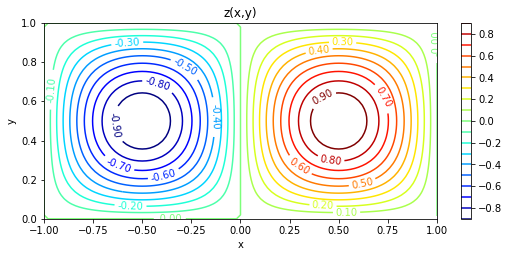

In [12]:
plt.figure(figsize=(8.8,3.6))
fig = plt.contour(xx,yy,z,levels=np.arange(-1.0,1.0,0.1),cmap='jet')
plt.axis('equal')
plt.clabel(fig, inline=1, fontsize=10,fmt='%3.2f');
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')

Contour plots are  all well and good, but what we were after was a continuous gradation of color, not the contour lines, so for that we use the function **contourf** instead: 

Text(0.5,1,'z(x,y)')

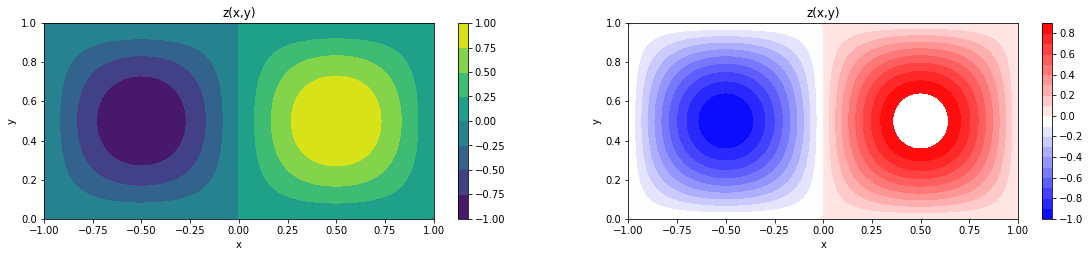

In [13]:
plt.figure(figsize=(9.6*2,3.6))

plt.subplot(1,2,1)
fig = plt.contourf(xx,yy,z) # all default options
plt.axis('equal') # this makes the axes square
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')


plt.subplot(1,2,2) # more options in contourf()
fig = plt.contourf(xx,yy,z,levels=np.arange(-1.0,1.0,0.1),cmap='bwr')
plt.axis('equal') # this makes the axes square
plt.axis('equal')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('z(x,y)')

### Example 1. make color plots together with basemap

So, let's put everything together - plot data on a map. For example, we want to plot the contoured elevation data onto an orthographic projection. First, we will generate a meshgrid using np.meshgrid from numpy and the method contourf of our map object m defined above. The method m.contourf works like matplotlib's:

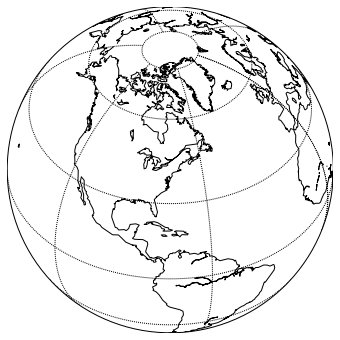

In [32]:
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")

# lon_0, lat_0 are the center point of the projection.
plt.figure(1,(6,6)) # make the figure instance with a size of 5x5
m = Basemap(projection='ortho',lon_0=-75,lat_0=42) # make an orthographic projection map object
m.drawcoastlines() # put on the coastlines
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.));

In [26]:
etopo=np.loadtxt('Datasets/Etopo/etopo20data.gz')
elons=np.loadtxt('Datasets/Etopo/etopo20lons.gz')
elats=np.loadtxt('Datasets/Etopo/etopo20lats.gz')
print (etopo.shape)
print (elons.shape)
print (elats.shape)

(540, 1081)
(1081,)
(540,)


**elats** is a 1D array with 540 latitudinal bins (this is a long and skinny array- 540 x 1). 

**elons** is a 1D array with 1081 longitudinal bins (this as a fat and wide array- 1 x 1081).  
And **etopo** is a 2D array with 540 rows and 1081 columns (540 x 1080).  

So **etopo** has an elevation for each lat/lon cell.  

In order to plot the elevation data onto a lat/lon grid, we have to first make a **2-D grid** (mesh) out of the 1D arrays of elats and elons. We use the **numpy** function **meshgrid( )** you've just learned for this:


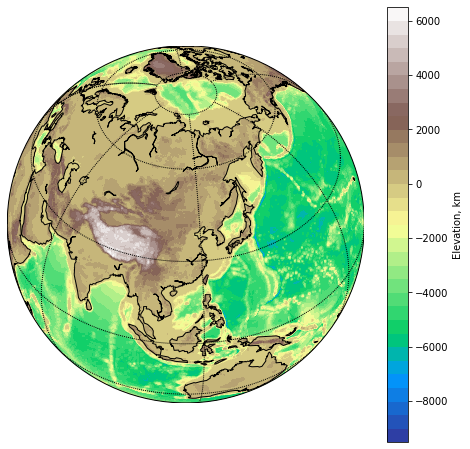

In [33]:
xx, yy = np.meshgrid(elons,elats) # mesh a 2-D lon-lat grid using the 1-D NumPy Arrays elons and elats

plt.figure(1,(8,8)) # make the figure instance with a size of 5x5
m = Basemap(projection='ortho',lon_0=114,lat_0=42) # make an orthographic projection map object
m.drawcoastlines() # put on the coastlines

x,y=m(xx,yy) # map to the Basemap coord

cs=m.contourf(x,y,etopo,30,cmap='terrain') # the 30 is the number of contours

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.));

bar = plt.colorbar()
bar.set_label('Elevation, km');

### 6. Example 2, International Geomagnetic Reference Field (IGRF)

Now we know how to grid and contour data, we can try to plot other features of our planet, like the magnetic field strength or inclination (dip below or above the horizontal).  I prepared a module named **mkigrf** for your mapping pleasure.   It includes a few functions that evaluate the elements of the magnetic field for any date between 1900 and 2020 including total field strength, direction, and radial field strength. Up until 2015, the data come from the  International Geomagnetic Reference Field (IGRF) model and after that, the data are extrapolated.  To learn more, check out this website:  https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html.

You can use the function **mkigrf.doigrf** to find out the magnetic declination at a particular time and place. You could then use this function to set your compass.  Handy for geology geeks...  

But  first, I should explain what the magnetic vector is.  As with all vectors, it has both direction and length.  We can express the vector in terms of cartesian coordinates (say, North, East and Down) or these polar coordinates:
- declination: the angle of the magnetic direction in the horizontal plane with respect to the North pole
- inclination: the angle of the magnetic direction in the vertical plane with respect to the horizontal
- intensity: the strength of the field, usually in units of tesla (either nano or micro). Tesla is is magnetic induction and is usually represented by the letter **B**.  

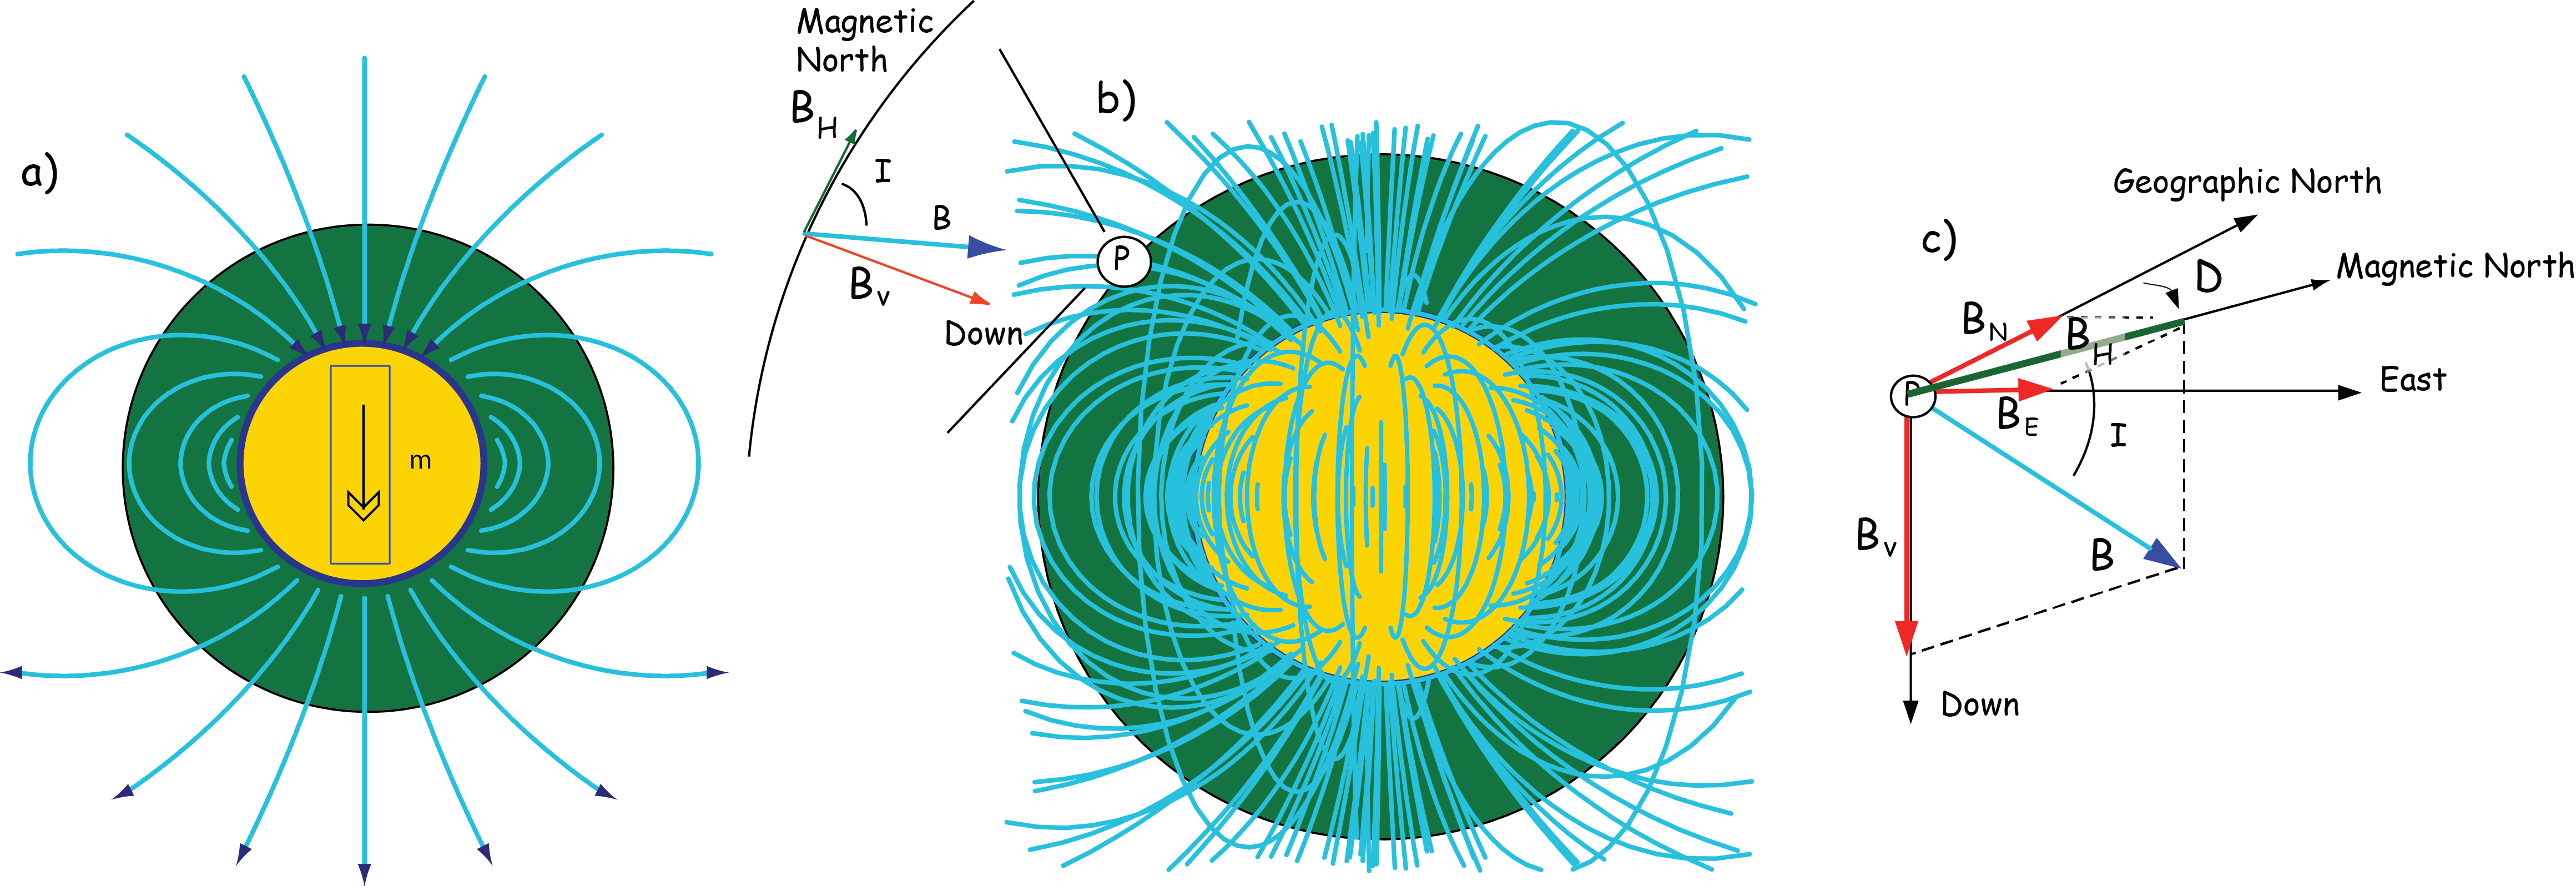

In [17]:
Image(filename='Figures/geomag.png')

_a) Lines of flux produced by  a geocentric axial dipole.  
b) Lines of flux  of the geomagnetic field of 2005.   At point P the horizontal component of the  field_ $B_H$, _is directed toward the magnetic north.  The vertical component_ $B_V$ _is directed down and the field makes an angle_ $I$ _with the horizontal, known as the
inclination.  
c) Components of the geomagnetic field vector_ ${\bf B}$.  _The angle between the horizontal component (directed toward magnetic north and geographic north is the 
declination_ $D$._) [Modified from Ben-Yosef et al., 2008, doi:10.1016/j.jas.2008.05.016] _

In [6]:
import mkigrf       # import the mkigrf module 
                    # Author: Lisa Tauxe, ltauxe@ucsd.edu
help(mkigrf.doigrf) # help info

Help on function doigrf in module mkigrf:

doigrf(long, lat, date)
    Returns the x,y,z,f components of the geomagnetic field at location long/lat for decimal year.
    x,y,z are the cartesian components of the field and f is the total field strength (in nT).



**mkigrf.doigrf** returns $x,y,z$ cartesian components of the magnetic field vector.  But we want to plot the polar coordinates _declination, inclination, and strength_.  So we need to convert from cartesian coordinates to polar coordinates.  There is a handy function  **mkigrf.cart2dir()** that will do this for you.   For example, we find the declination, inclination and magnitude of geomagnetic field for Hong Kong in 2017 like this:

In [7]:
HK_lat=22
HK_lon=114
x,y,z,f=mkigrf.doigrf(HK_lon,HK_lat,2018)
Dec,Inc,B=mkigrf.cart2dir(x,y,z)
print ('The Declination of the geomagnetic field at Lat =',HK_lat,'and Lon =',HK_lon,'is %4.1f'%(Dec),'degrees') # notice the formatting
print ('The Inclination of the geomagnetic field at Lat =',HK_lat,'and Lon =',HK_lon,'is %4.1f'%(Inc),'degrees') 
print ('The Magnitude   of the geomagnetic field at Lat =',HK_lat,'and Lon =',HK_lon,'is %4.1f'%(B),'nano-Tesla') 

The Declination of the geomagnetic field at Lat = 22 and Lon = 114 is 357.2 degrees
The Inclination of the geomagnetic field at Lat = 22 and Lon = 114 is 32.8 degrees
The Magnitude   of the geomagnetic field at Lat = 22 and Lon = 114 is 45070.5 nano-Tesla


We can use the tools in **mkigrf** to evaluate the magnetic field over the surface of the Earth and then contour it on, say, a Hammer projection.  I'm going to go ahead and make a function for this so we can change the map central longitude and date as we like. 

In [8]:
def magMap(date,**kwargs):
    """
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = array of latitudes

    """
    if 'lon_0' in kwargs.keys(): # check if there are keyword arguments
        lon_0=kwargs['lon_0'] # if lon_0 is set, use that one
    else: # otherwise..... 
        lon_0=0. # set the default lon_0 to 0. 
    
    incr=10 # we can vary to the resolution of the model
    lonmax=(lon_0+180.)%360+incr # get some parameters for our arrays of lat/lon
    lonmin=(lon_0-180.)
    latmax=90+incr
    lons=np.arange(lonmin,lonmax,incr) # make a 1D array of longitudes (like elons)
    lats=np.arange(-90,latmax,incr)# make a 1D array of longitudes (like elats)
    
    
    # set up some containers for the field elements
    lenLats, lenLons = len(lats), len(lons)
    B=np.zeros((lenLats,lenLons))
    Binc=np.zeros((lenLats,lenLons))
    Bdec=np.zeros((lenLats,lenLons))
    Brad=np.zeros((lenLats,lenLons))
    
    for j in range(lenLats): # step through the latitudes
        for i in range(lenLons): # and the longitudes
            x,y,z,f=mkigrf.doigrf(lons[i],lats[j],date)  # get the field elements
            Dec,Inc,Int=mkigrf.cart2dir(x,y,z) # turn them into polar coordites
            B[j][i]=Int*1e-3 # convert the string to microtesla (from nT)
            Binc[j][i]=Inc # store the inclination value
            Bdec[j][i]=Dec # store the declination value
    return Bdec,Binc,B,lons,lats # return the arrays.  

We can call magMap for any date we like.  

In [9]:
date=2018 # let's do this for 2018 (actually, this is the beginning of 2017)
lon_0=0 # we can specify the grid spacing and the intended 0 longitude for the plot
Ds,Is,Bs,lons,lats=magMap(date,lon_0=lon_0)

 Now let's plot the magnitude of IGRF (Bs) on a contour map.  

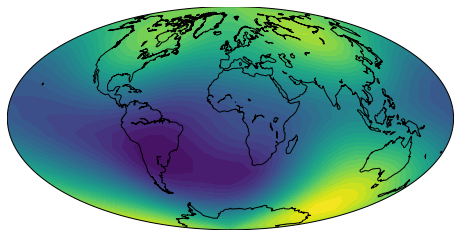

In [34]:
plt.figure(figsize=(8,6))

m = Basemap(projection='hammer',lon_0=lon_0) # create a map proj
m.drawcoastlines() # draw coastlines

xx, yy = np.meshgrid(lons,lats) # mesh a 2-D lon-lat grid

x,y=m(xx,yy)
m.contourf(x,y,Bs,30,cmap='viridis') # filled contour with 30 (automatic) levels

# by assigning the contourf object to cs, we can add a colorbar
#cbar=m.colorbar(cs,location='bottom') # display colorbar in the bottom
#plt.title('Field strength ($\mu$T): '+str(date)); #label 

tada!